# Task 1 - Leeseok Kim (lk379@cornell.edu)

# 1.1 Provide a variational (also called parametric) circuit which is able to generate the most general 1 qubit state. By most general 1 qubit state we mean that there exists a set of the parameters in the circuit such that any point in the Bloch sphere can be reached. Check that the circuit works correctly by showing that by varying randomly the parameters of your circuit you can reproduce correctly the Bloch sphere.


--Step 1: Generate a single parametrized U3 gate with a set of randomly chosen paraemeters from 0 to 4π. Express the corresponding quantum state in the Bloch Sphere--

In [4]:
#Generate three randomly chosen parameters
import numpy as np
import random

from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [5]:
params_init=[]
num_params=3
for i in range(num_params):
    params_init.append(random.uniform(0, 2*np.pi))

In [6]:
params_init

[3.9234675988210457, 3.1534554958242444, 4.019477243233784]

In [7]:
#Generate a parametrized U3 gate
qc = QuantumCircuit(1)
qc.u3(params_init[0],params_init[1],params_init[2],0)
qc.draw()

┌──────────────────────────┐
q_0: ┤ U3(3.9235,3.1535,4.0195) ├
     └──────────────────────────┘

In [8]:
backend = Aer.get_backend('statevector_simulator') 
result = execute(qc,backend).result() 
out_state = result.get_statevector()

In [9]:
print(out_state) # Display the output state vector

[-0.38105532+0.j         -0.92448718-0.01096756j]


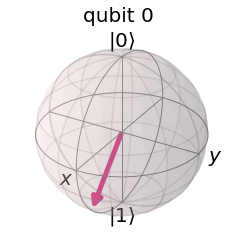

In [10]:
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

plot_bloch_multivector(out_state, title='')

--Step 2: Run this procedure 5 times and collect data of quantum states--

In [38]:
#Let pick 5 random parameter sets

params_set=[]
for _ in range(5):
    for i in range(3):
        params_set.append(random.uniform(0, 4*np.pi))
print(params_set)

[0.6350165061439164, 4.3670347853910805, 4.836949959270308, 11.390128710963214, 4.160826412053002, 9.630987011313325, 1.7344869274558852, 4.231609389214571, 5.7518016615085905, 12.556316511055, 10.43153838974227, 9.238299103652453, 5.191935382224653, 6.886386263930807, 4.443233501776999]


In [39]:
#Generate quantum states based on the randomly chosen parameter sets

random1 = QuantumCircuit(1)
random2 = QuantumCircuit(1)
random3 = QuantumCircuit(1)
random4 = QuantumCircuit(1)
random5 = QuantumCircuit(1)


random1.u3(params_set[0], params_set[1], params_set[2],0)
random2.u3(params_set[3], params_set[4], params_set[5],0)
random3.u3(params_set[6], params_set[7], params_set[8],0)
random4.u3(params_set[9], params_set[10], params_set[11],0)
random5.u3(params_set[12], params_set[13], params_set[14],0)

backend = Aer.get_backend('statevector_simulator') 

randstate1 = execute(random1,backend).result().get_statevector() 
randstate2 = execute(random2,backend).result().get_statevector() 
randstate3 = execute(random3,backend).result().get_statevector() 
randstate4 = execute(random4,backend).result().get_statevector() 
randstate5 = execute(random5,backend).result().get_statevector() 

In [40]:
# Display 5 random states

print(randstate1)
print(randstate2)
print(randstate3)
print(randstate4)
print(randstate5)

[ 0.95001629+0.j         -0.10568917-0.29376665j]
[0.83198464+0.j         0.29072488+0.47252577j]
[ 0.646931  +0.j         -0.35265623-0.67610197j]
[0.99998736+0.j         0.00268746+0.00424837j]
[-0.85480313+0.j          0.42736976+0.29439207j]


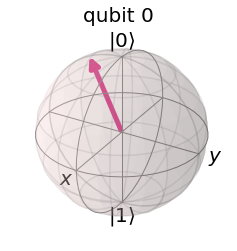

In [41]:
#Let us see where these random states point in the Bloch sphere

plot_bloch_multivector(randstate1, title='')

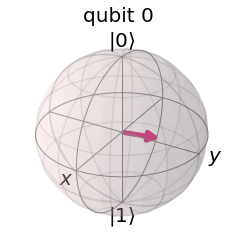

In [42]:
plot_bloch_multivector(randstate2, title='')

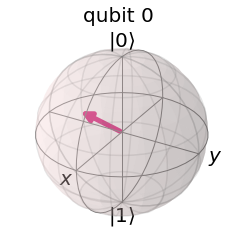

In [68]:
plot_bloch_multivector(randstate3, title='')

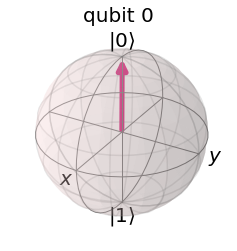

In [69]:
plot_bloch_multivector(randstate4, title='')

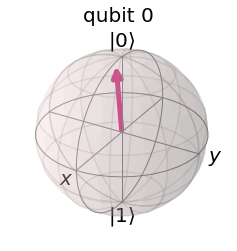

In [70]:
plot_bloch_multivector(randstate5, title='')

# 1.2 Use the circuit built in step 1) and, using the SWAP test, find the best choice of your parameters to reproduce a randomly generated quantum state made with 1 qubit.

In [47]:
import pennylane as qml

In [48]:
#First, design a variational ansatz U3 in the language of Pennylane

def U3ansatz(params, wires):
    qml.U3(params[0], params[1], params[2], wires=wires)

In [49]:
#This is the state that we obtained in part 1-1)
params = params_init
print(params)

[3.9234675988210457, 3.1534554958242444, 4.019477243233784]


In [50]:
dev = qml.device("default.qubit", wires=3)

In [51]:
#Build the swap test function

@qml.qnode(dev)
def swap_test(params, new_params):
    
    U3ansatz(params, wires=1)
    U3ansatz(new_params, wires=2)
    
    qml.Hadamard(wires=0)
    qml.CSWAP(wires=[0, 1, 2])
    qml.Hadamard(wires=0)
    
    return qml.expval(qml.PauliZ(0))

In [52]:
#Generate random initial parameter that you start off with 

params_swap=[]
num_params=3
for i in range(num_params):
    params_swap.append(random.uniform(0, 2*np.pi))
print(params_swap)

[4.641328337067424, 5.198789232620437, 0.5820301561093995]


In [71]:
#Optimize the cost function (i.e. Swap Test) through RMS
optimizer = qml.RMSPropOptimizer(stepsize=0.01)
pars = params_swap

for i in range(2000):
    
    # Walk one optimization step
    pars = optimizer.step(lambda w: -1*swap_test(params, w), pars)
    if i % 100 == 0:
        print("Step", i, "done.")

Step 0 done.
Step 100 done.
Step 200 done.
Step 300 done.
Step 400 done.
Step 500 done.
Step 600 done.
Step 700 done.
Step 800 done.
Step 900 done.
Step 1000 done.
Step 1100 done.
Step 1200 done.
Step 1300 done.
Step 1400 done.
Step 1500 done.
Step 1600 done.
Step 1700 done.
Step 1800 done.
Step 1900 done.


In [72]:
#Print Updated, optimal parameters

print(pars)

[3.918465390840326, 3.1584643155179206, 0.5820301561066294]


In [73]:
#Check the value of the swap test result

swap_test(params, pars)

0.9999906462872932

In [56]:
#Check explicitly whether these two states are equivalent

qc1 = QuantumCircuit(1)
qc1.u3(params[0],params[1],params[2],0)

qc2 = QuantumCircuit(1)
qc2.u3(pars[0],pars[1],pars[2],0)

backend = Aer.get_backend('statevector_simulator') 
result1 = execute(qc1,backend).result() 
result2 = execute(qc2,backend).result() 

out_state1 = result1.get_statevector()
out_state2 = result2.get_statevector()

In [57]:
print(out_state1, out_state2) #You can check that the two states are very similar!

[-0.38105532+0.j         -0.92448718-0.01096756j] [-0.37874173+0.j         -0.92537068-0.01561402j]


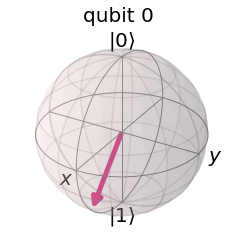

In [58]:
# Visualize the two states in the Bloch sphere

plot_bloch_multivector(out_state1,title='')

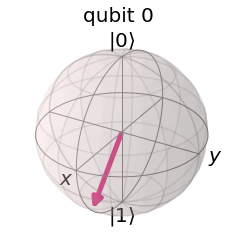

In [59]:
plot_bloch_multivector(out_state2,title='')

# 1.3 Suppose you are given with a random state, made by N qubits, for which you only know that it is a product state and each of the qubits are in the state | 0 > or | 1>. By product state we mean that it can be written as the product of single qubit states, without the need to do any summation. Perform a qubit by qubit SWAP test to reconstruct the state.

In [60]:
# Generate a random product state made by N qubits
# You can make a random product state by putting X gates on random wire numbers
# Choose N = 5; You can always expand it to any number of N that you want to set 

def randomstate():
    index =[]
    for _ in range(5):
        index.append(random.randint(0,1))
    
    for i in range(len(index)):
        if index[i] == 1:
            qml.RX(np.pi, wires=i)

In [61]:
dev1 = qml.device("default.qubit", wires=11)

@qml.qnode(dev1)
def swap_test1(params):
    
    #Random State
    randomstate()
    
    #Variational CIrcuit
    for i in range(5):
        qml.RX(params[i], wires=i+5)
    
    qml.Hadamard(wires=0)
    for k in range(5):
        qml.CSWAP(wires=[0, k + 1, 5 + k + 1])
    qml.Hadamard(wires=0)
    
    return qml.expval(qml.PauliZ(0))

In [62]:
#Let us iterate all the possible parameter candidates for our variational circuit defined above

import itertools
candidate = [0, np.pi]

candidatelist = [list(i) for i in itertools.product(candidate, repeat=5)]

print(candidatelist)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 3.141592653589793], [0, 0, 0, 3.141592653589793, 0], [0, 0, 0, 3.141592653589793, 3.141592653589793], [0, 0, 3.141592653589793, 0, 0], [0, 0, 3.141592653589793, 0, 3.141592653589793], [0, 0, 3.141592653589793, 3.141592653589793, 0], [0, 0, 3.141592653589793, 3.141592653589793, 3.141592653589793], [0, 3.141592653589793, 0, 0, 0], [0, 3.141592653589793, 0, 0, 3.141592653589793], [0, 3.141592653589793, 0, 3.141592653589793, 0], [0, 3.141592653589793, 0, 3.141592653589793, 3.141592653589793], [0, 3.141592653589793, 3.141592653589793, 0, 0], [0, 3.141592653589793, 3.141592653589793, 0, 3.141592653589793], [0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 0], [0, 3.141592653589793, 3.141592653589793, 3.141592653589793, 3.141592653589793], [3.141592653589793, 0, 0, 0, 0], [3.141592653589793, 0, 0, 0, 3.141592653589793], [3.141592653589793, 0, 0, 3.141592653589793, 0], [3.141592653589793, 0, 0, 3.141592653589793, 3.141592653589793], [3.141592653589793,

In [63]:
#Now let us calculate swap test values and see what yields 

for i in range(2**5 ):
    print(swap_test1(candidatelist[i]))

0.0
0.0
0.0
0.0
0.0
0.9999999999999996
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


-- Nice, we found that the 6th candidate parameter set constructs the state! So let's reconstruct the state --

In [65]:
#Now reconstruct the state by using parameter found above

qc3 = QuantumCircuit(5)
for i in range(5):
    qc3.rx(candidatelist[5][i],i)

backend = Aer.get_backend('statevector_simulator') 
result3 = execute(qc3,backend).result() 

out_state3 = result3.get_statevector()

In [66]:
print(out_state3)

[ 3.74939946e-33+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  3.74939946e-33-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  3.74939946e-33-6.1232340e-17j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
 -1.00000000e+00-1.2246468e-16j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.00000

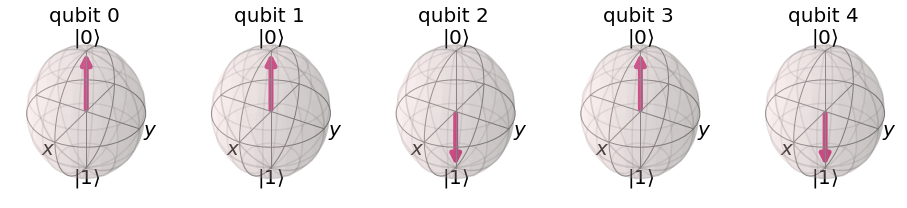

In [67]:
# Check the product state: |00101>

plot_bloch_multivector(out_state3,title='')